In [1]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\mikek\projects\Text-Normalization\src\data\normalization_assesment_dataset_10k.csv")
print(df)

                                  raw_comp_writers_text  \
0               Jordan Riley/Adam Argyle/Martin Brammer   
1                                         Martin Hygård   
2     Jesse Robinson/Greg Phillips/Kishaun Bailey/Ka...   
3                                        Mendel Brikman   
4                                             Alvin Lee   
...                                                 ...   
9995                                      Terrance Byrd   
9996                                       Pillar Point   
9997  FRANK BRIAN KEITH (MR)/JENNINGS JOHN JOSEPH IV...   
9998                                       Sierra Lucas   
9999                         Budde Music/Lorenz Brunner   

                                             CLEAN_TEXT  
0               Jordan Riley/Adam Argyle/Martin Brammer  
1                                         Martin Hygård  
2     Jesse Robinson/Greg Phillips/Kishaun Bailey/Ka...  
3                                                   NaN  
4

**Redundant entries:** Many CLEAN_TEXT values are identical to raw_comp_writers_text

In [3]:

print("CLEAN_TEXT values identical to raw_comp_writers_text:",df[df['raw_comp_writers_text'] == df['CLEAN_TEXT']].shape[0])
print("percentage of CLEAN_TEXT values identical to raw_comp_writers_text:",(df[df['raw_comp_writers_text'] == df['CLEAN_TEXT']].shape[0]/df.shape[0]) * 100,"%")

print(df[df['raw_comp_writers_text'] == df['CLEAN_TEXT']])

CLEAN_TEXT values identical to raw_comp_writers_text: 6323
percentage of CLEAN_TEXT values identical to raw_comp_writers_text: 63.23 %
                                  raw_comp_writers_text  \
0               Jordan Riley/Adam Argyle/Martin Brammer   
1                                         Martin Hygård   
2     Jesse Robinson/Greg Phillips/Kishaun Bailey/Ka...   
4                                             Alvin Lee   
6                                          Mefi Morales   
...                                                 ...   
9992  Ludovic Berrou/Jean-Christophe Colliou/Damien ...   
9993  Jonny Buckland/Guy Berryman/Will Champion/Chri...   
9995                                      Terrance Byrd   
9996                                       Pillar Point   
9998                                       Sierra Lucas   

                                             CLEAN_TEXT  
0               Jordan Riley/Adam Argyle/Martin Brammer  
1                                       

**Missing values:** Some rows have NaN values.

In [4]:
print("Empty CLEAN_TEXT values:",df[df['CLEAN_TEXT'].isnull()].shape[0])
print("percentage of Empty CLEAN_TEXT values:",(df[df['CLEAN_TEXT'].isnull()].shape[0]/df.shape[0]) * 100,"%")

print(df[df['CLEAN_TEXT'].isnull()])


Empty CLEAN_TEXT values: 1341
percentage of Empty CLEAN_TEXT values: 13.41 %
                                  raw_comp_writers_text CLEAN_TEXT
3                                        Mendel Brikman        NaN
8                               UNKNOWN WRITER (999990)        NaN
25                                               fo man        NaN
27                                          Traditional        NaN
28                                            #unknown#        NaN
...                                                 ...        ...
9968                                   Phanendra/Shakti        NaN
9974  AEPI/Hamburge, Darjean/Hamburge, Darjean, Sevi...        NaN
9976  Orhan Gencebay, Yaacov Lamai, Dolev Ram, Penn ...        NaN
9979                             Galkin A./Afanas'ev V.        NaN
9981                                              VCPMC        NaN

[1341 rows x 2 columns]


In [5]:
print("Empty raw_comp_writers_text values:",df[df['raw_comp_writers_text'].isnull()].shape[0])
print("percentage of Empty raw_comp_writers_text values:",(df[df['raw_comp_writers_text'].isnull()].shape[0]/df.shape[0]) * 100,"%")

print(df[df['raw_comp_writers_text'].isnull()])

Empty raw_comp_writers_text values: 1
percentage of Empty raw_comp_writers_text values: 0.01 %
    raw_comp_writers_text CLEAN_TEXT
165                   NaN        NaN


[('<Unknown>', 341), ('Copyright Control', 119), ('Traditional', 21), ('Wolfgang Amadeus Mozart', 20), ('COPYRIGHT CONTROL', 20), ('Sameer', 16), ('Giuseppe Verdi', 14), ('Johann Sebastian Bach', 11), ('[traditional]', 10), ('Ludwig van Beethoven', 9), ('Billie Ray Fingers', 9), ('Bruce Fingers', 9), ('Thomas Bergersen', 9), ('ZUN', 9), ('John Lennon', 8), ('Paul McCartney', 8), ('Juice WRLD', 8), ('Anand Bakshi', 8), ('LEEZ', 8), ('Ollounder', 8), ('George Gershwin', 8), ('Savan Kotecha', 7), ('WRITER UNKNOWN', 7), ('Robert Hunter', 7), ('Not Documented', 7), ('Richard Strauss', 7), ('A. R. Rahman', 7), ('김홍중', 7), ('EDEN', 7), ('송민기', 7), ('Max Martin', 7), ('Nadeem-Shravan', 6), ('Jesús María Corman', 6), ('Mikel Erentxun', 6), ('Andrew Lloyd Webber', 6), ('Antonio Vivaldi', 6), ('Phạm Duy', 6), ('Ritchie Blackmore', 6), ('Phil Collins', 6), ('Lorenzo Da Ponte', 6), ('Franz Schubert', 6), ('Lars Ulrich', 6), ('James Hetfield', 6), ('Sony', 6), ('Sonoton Music GmbH & Co. KG', 6), ('T

C:\Users\mikek\AppData\Local\Temp\ipykernel_12772\4286321527.py:28: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_12772\4286321527.py:28: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_12772\4286321527.py:28: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_12772\4286321527.py:28: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_12772\4286321527.py:28: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_12772\4286321527.py:28: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing f

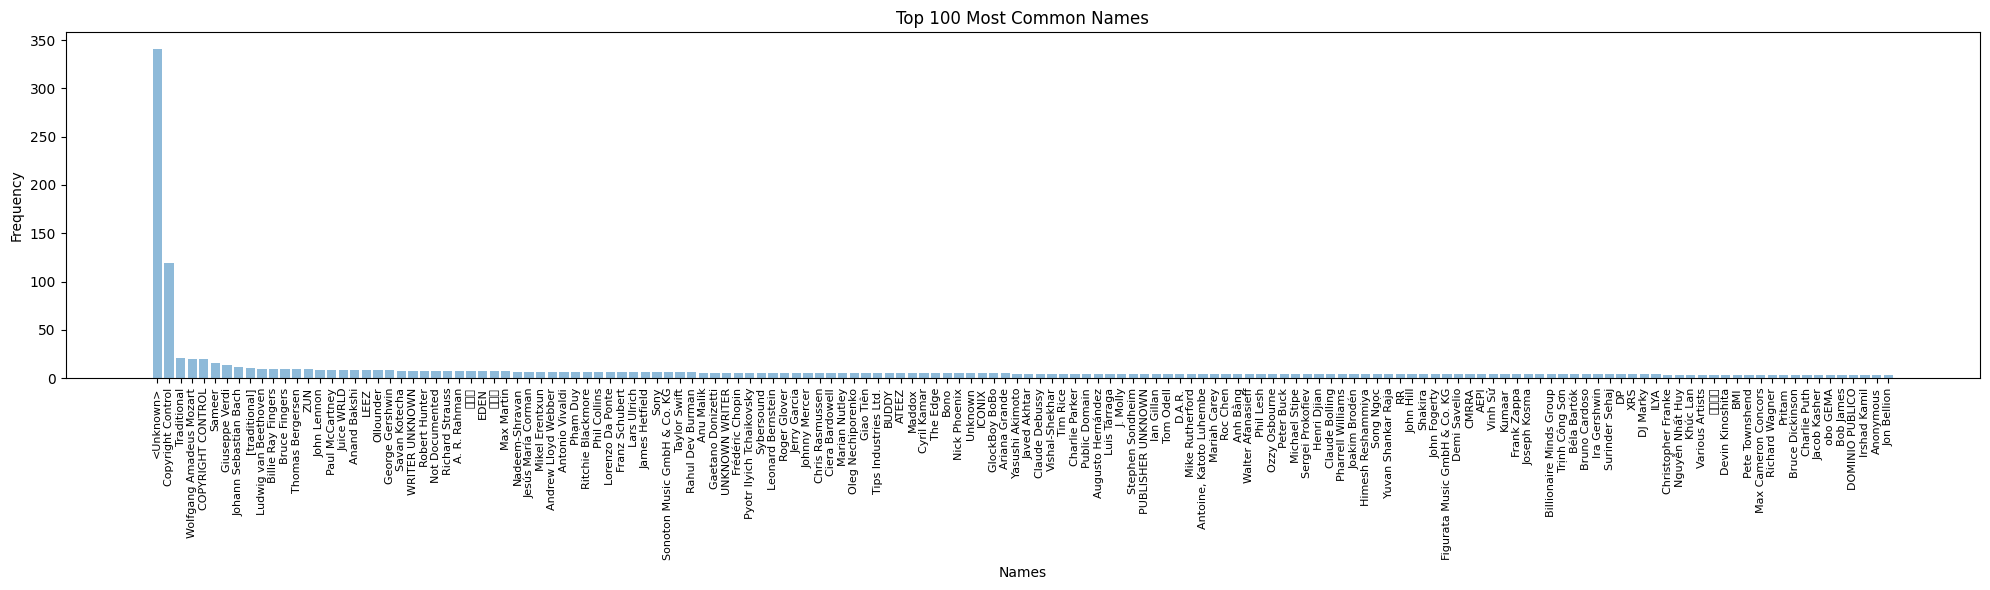

In [6]:

names_raw = []
for text in df['raw_comp_writers_text']:
    if isinstance(text, float):
        continue
    names_raw += re.split(r'/', text)

# Count the frequency of each name
name_freq_raw = Counter(names_raw)
print(name_freq_raw.most_common(100))

# Create a histogram of the most common names
names = [name for name, freq in name_freq_raw.most_common(150)]
freq = [freq for name, freq in name_freq_raw.most_common(150)]
y_pos = np.arange(len(names))

plt.figure(figsize=(20, 6))

# Plot the bar chart
plt.bar(y_pos, freq, align='center', alpha=0.5)

# Customize x-axis labels
plt.xticks(y_pos, names, rotation=90, fontsize=8)

plt.xlabel('Names')
plt.ylabel('Frequency')
plt.title('Top 100 Most Common Names')

plt.tight_layout() 
plt.show()
